<a href="https://colab.research.google.com/github/avikumart/LLM-GenAI-Transformers-Notebooks/blob/main/LLMs_from_Scratch/Working_with_text_ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# create a requirement.txt file
with open("requirements.txt", "w") as f:
    f.writelines

In [2]:
with open("requirements.txt", "r") as f:
    print(f.read())

In [3]:
!pip install -r requirements.txt

## Tokenization of the raw text

In [4]:
from importlib.metadata import version

print("torch version:", version("torch"))
print("tiktoken version:", version("tiktoken"))
print("numpy version:", version("numpy"))

torch version: 2.8.0+cu126
tiktoken version: 0.12.0
numpy version: 2.0.2


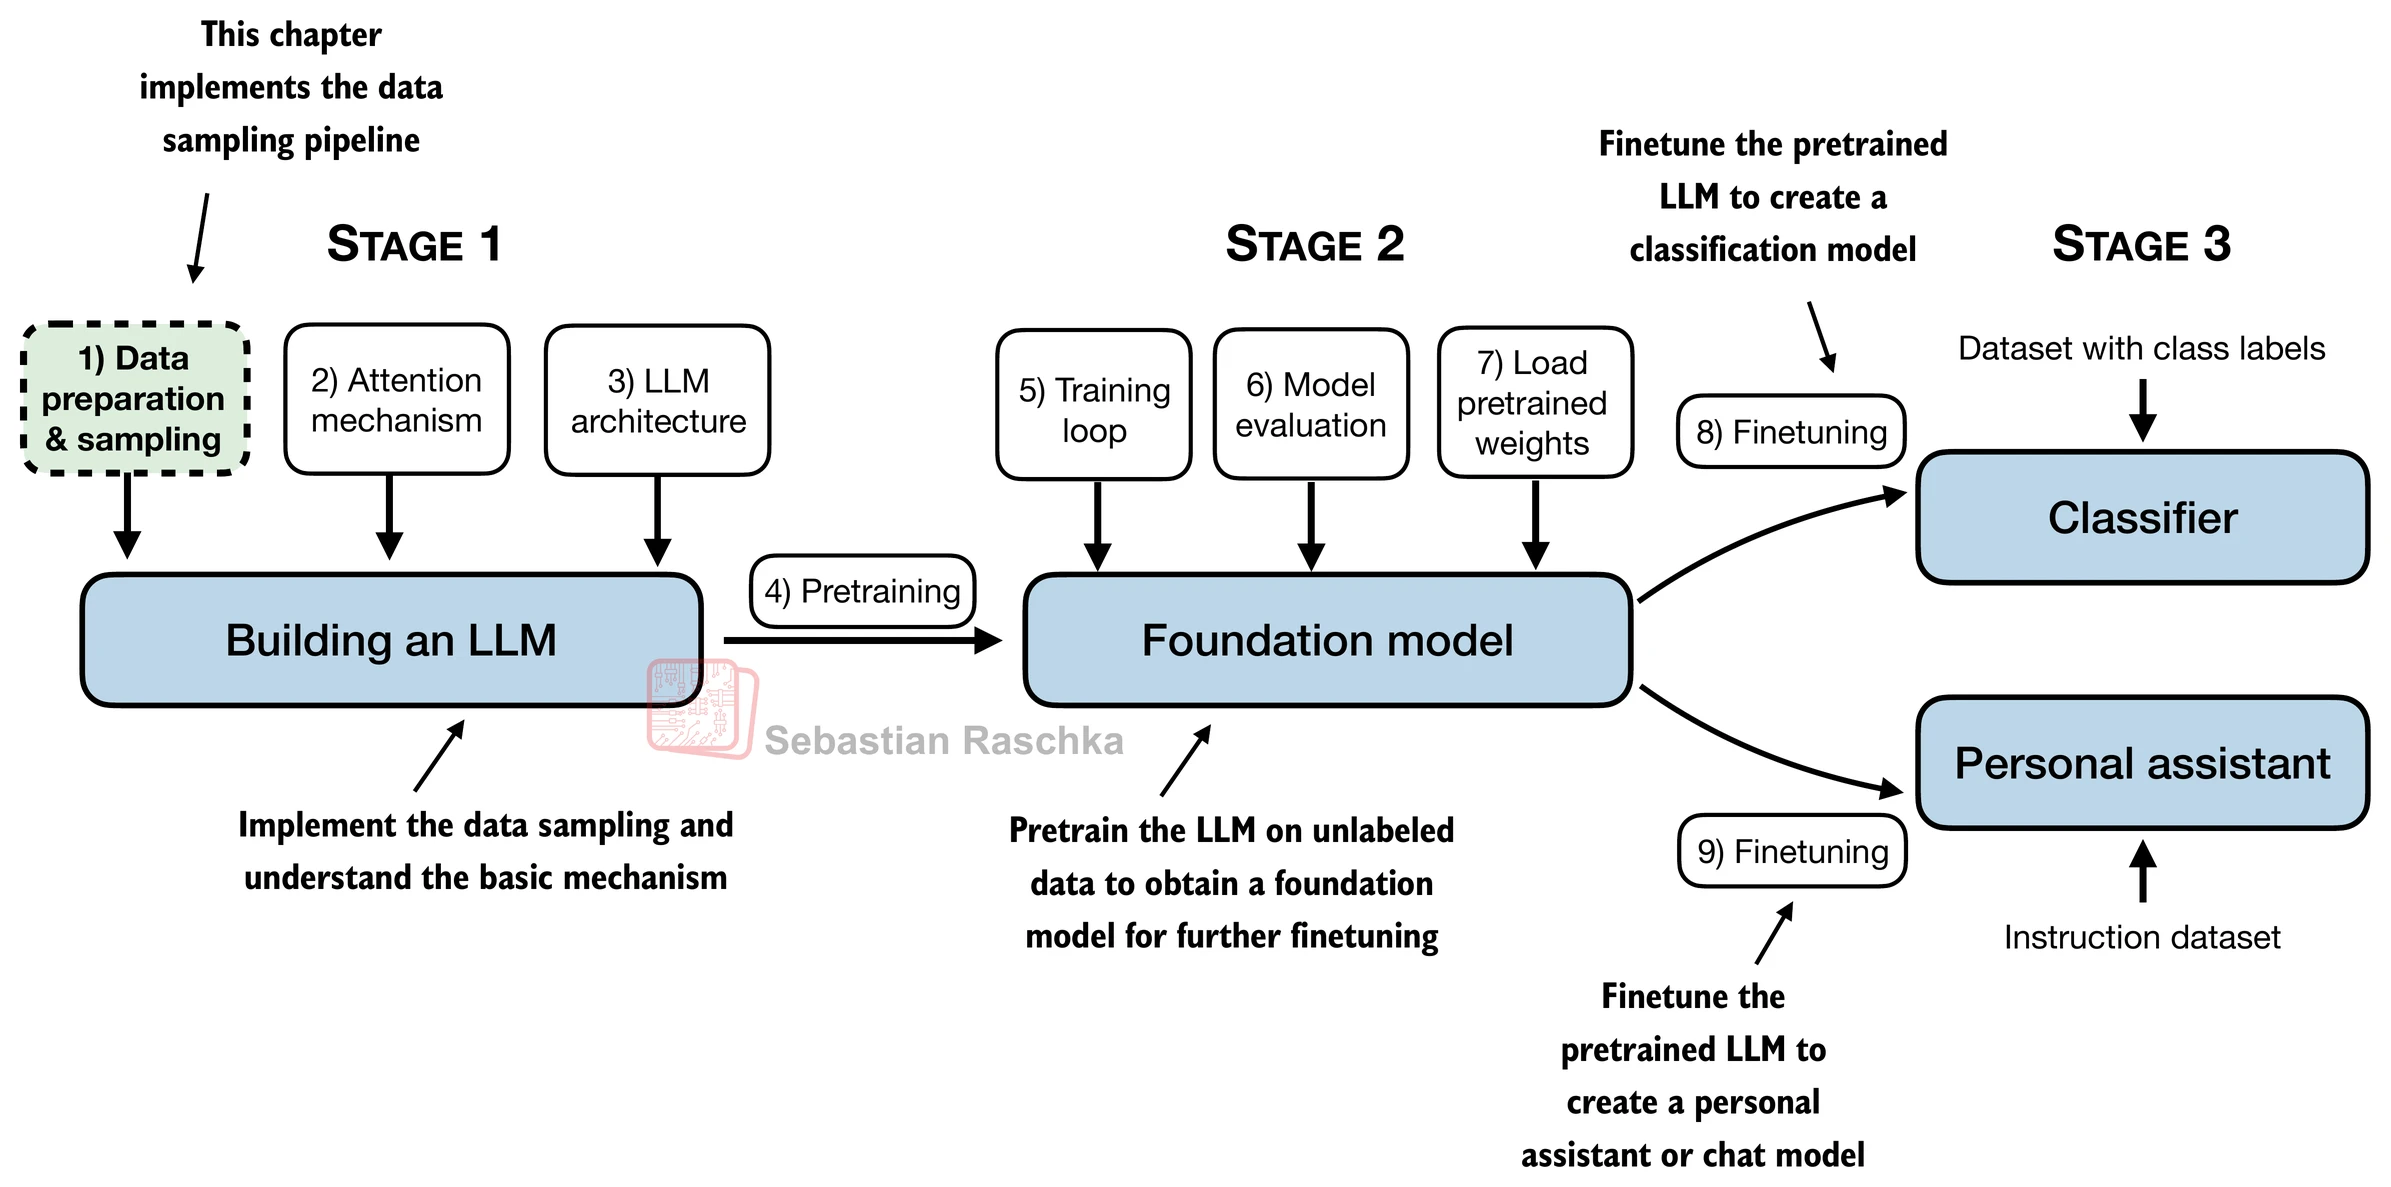

In [5]:
# text data are converted into vectors
import os
import urllib.request

if not os.path.exists("the-verdict.txt"):
    url = ("https://raw.githubusercontent.com/rasbt/"
           "LLMs-from-scratch/main/ch02/01_main-chapter-code/"
           "the-verdict.txt")
    file_path = "the-verdict.txt"
    urllib.request.urlretrieve(url, file_path)

In [6]:
# adding the new data
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
print("total length of the text", len(raw_text))
print(raw_text[:100])

total length of the text 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no g


In [7]:
import re

# split the tokens
text = "Hello, this is the test sample"
result = re.split(r"(\s)", text)

print(result)

['Hello,', ' ', 'this', ' ', 'is', ' ', 'the', ' ', 'test', ' ', 'sample']


In [8]:
# split by the space and (,.) chars
result = re.split(r'([,.]|\s)', text)
print(result)

['Hello', ',', '', ' ', 'this', ' ', 'is', ' ', 'the', ' ', 'test', ' ', 'sample']


In [9]:
# remove the whitespace
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'this', 'is', 'the', 'test', 'sample']


In [10]:
# handle the other types of the punctuation
result = [item for item in result if not item in [",", ".", " "]]
print(result)

['Hello', 'this', 'is', 'the', 'test', 'sample']


In [11]:
# text for the tokenization techniques
text = "Hello, world. Is this-- a test?"

result = re.split(r'([,.]|\s|--|\?)', text)
result = [item for item in result if item.strip()]
result = [item for item in result if not item in [",", ".", "?", " "]]
print(result)

['Hello', 'world', 'Is', 'this', '--', 'a', 'test']


In [31]:
# tokenization of the raw text
preprocessed_text = re.split(r'([,.]|\s|--|\?)', raw_text)
preprocessed_text = [item for item in preprocessed_text if item.strip() or item == ' '] # Keep spaces
preprocessed_text = [item for item in preprocessed_text if not item in [",", ".", "?", ""]]
print(preprocessed_text)

['I', ' ', 'HAD', ' ', 'always', ' ', 'thought', ' ', 'Jack', ' ', 'Gisburn', ' ', 'rather', ' ', 'a', ' ', 'cheap', ' ', 'genius', '--', 'though', ' ', 'a', ' ', 'good', ' ', 'fellow', ' ', 'enough', '--', 'so', ' ', 'it', ' ', 'was', ' ', 'no', ' ', 'great', ' ', 'surprise', ' ', 'to', ' ', 'me', ' ', 'to', ' ', 'hear', ' ', 'that', ' ', 'in', ' ', 'the', ' ', 'height', ' ', 'of', ' ', 'his', ' ', 'glory', ' ', 'he', ' ', 'had', ' ', 'dropped', ' ', 'his', ' ', 'painting', ' ', 'married', ' ', 'a', ' ', 'rich', ' ', 'widow', ' ', 'and', ' ', 'established', ' ', 'himself', ' ', 'in', ' ', 'a', ' ', 'villa', ' ', 'on', ' ', 'the', ' ', 'Riviera', ' ', '(Though', ' ', 'I', ' ', 'rather', ' ', 'thought', ' ', 'it', ' ', 'would', ' ', 'have', ' ', 'been', ' ', 'Rome', ' ', 'or', ' ', 'Florence', ')', '"The', ' ', 'height', ' ', 'of', ' ', 'his', ' ', 'glory"', '--', 'that', ' ', 'was', ' ', 'what', ' ', 'the', ' ', 'women', ' ', 'called', ' ', 'it', ' ', 'I', ' ', 'can', ' ', 'hear', ' ',

## Converting tokens into token IDs

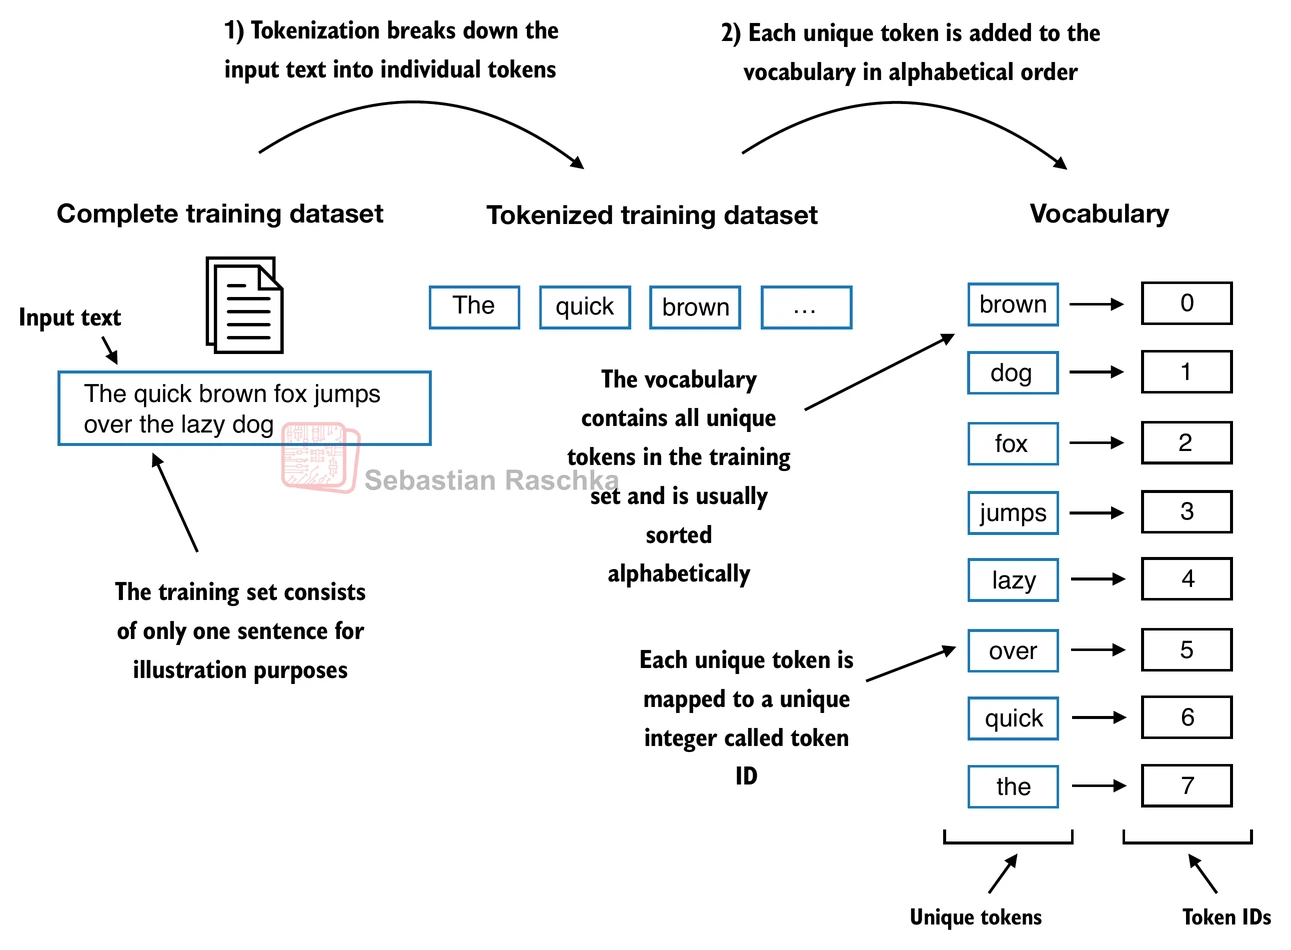

Source: LLMs from scratch by Sabatian R.

In [13]:
# length of the input
print(len(preprocessed_text))

3856


In [34]:
# check the unique words in the corpus
print(len(set(preprocessed_text)))

1238


In [35]:
# create the vocab of the tokens
vocab = {token:inte for inte, token in enumerate(sorted(set(preprocessed_text)))}
print(vocab)

{' ': 0, '"': 1, '"Ah': 2, '"Be': 3, '"Begin': 4, '"By': 5, '"Come': 6, '"Destroyed': 7, '"Don\'t': 8, '"Gisburns"': 9, '"Grindles': 10, '"Hang': 11, '"Has': 12, '"How': 13, '"I': 14, '"I\'d': 15, '"If': 16, '"It': 17, '"It\'s': 18, '"Jack': 19, '"Money\'s': 20, '"Moon-dancers"': 21, '"Mr': 22, '"Mrs': 23, '"My': 24, '"Never': 25, '"Of': 26, '"Oh': 27, '"Once': 28, '"Only': 29, '"Or': 30, '"That': 31, '"The': 32, '"Then': 33, '"There': 34, '"There:': 35, '"This': 36, '"We': 37, '"Well': 38, '"What': 39, '"When': 40, '"Why': 41, '"Yes': 42, '"You': 43, '"but': 44, '"deadening': 45, '"dragged': 46, '"effects";': 47, '"interesting":': 48, '"lift': 49, '"obituary"': 50, '"strongest': 51, '"strongly"': 52, '"sweetly"': 53, "'": 54, "'Are": 55, "'It's": 56, "'coming'": 57, "'done'": 58, "'subject": 59, "'technique'": 60, "'way": 61, '(I': 62, '(Though': 63, ')': 64, '--': 65, 'A': 66, 'Among': 67, 'And': 68, 'Arrt': 69, 'As': 70, 'At': 71, 'Burlington': 72, 'But': 73, 'By': 74, 'Carlo': 75, 

In [32]:
# write a sample tokenizer for the input text to map the output
class SimpleTokenizer:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {inte:token for token, inte in vocab.items()}

    def encode(self, text):
      preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)

      return [self.str_to_int[token] for token in preprocessed]

    def decode(self, ids):
      text =  " ".join([self.int_to_str[id] for id in ids])
      return text


- encode: encodes the input to the tokens ids
- decode: decodes the ids into the text tokens

In [38]:
# test the simmpletokenizer:
tokenizer = SimpleTokenizer(vocab)

text = "It the last he painted you know Mrs Gisburn said with pardonable pride"
encoded_text = tokenizer.encode(text)
print(encoded_text)

[110, 0, 1081, 0, 684, 0, 604, 0, 835, 0, 1232, 0, 677, 0, 122, 0, 89, 0, 943, 0, 1210, 0, 845, 0, 885]


In [39]:
tokenizer.decode(encoded_text)

'It   the   last   he   painted   you   know   Mrs   Gisburn   said   with   pardonable   pride'

In [40]:
# extend the token with endoftext and uk tokens
all_tokens = sorted(set(preprocessed_text))
all_tokens.extend(['<|endoftext|>', '<|uk|>'])

vocab = {token:inte for inte, token in enumerate(all_tokens)}
print(vocab)

{' ': 0, '"': 1, '"Ah': 2, '"Be': 3, '"Begin': 4, '"By': 5, '"Come': 6, '"Destroyed': 7, '"Don\'t': 8, '"Gisburns"': 9, '"Grindles': 10, '"Hang': 11, '"Has': 12, '"How': 13, '"I': 14, '"I\'d': 15, '"If': 16, '"It': 17, '"It\'s': 18, '"Jack': 19, '"Money\'s': 20, '"Moon-dancers"': 21, '"Mr': 22, '"Mrs': 23, '"My': 24, '"Never': 25, '"Of': 26, '"Oh': 27, '"Once': 28, '"Only': 29, '"Or': 30, '"That': 31, '"The': 32, '"Then': 33, '"There': 34, '"There:': 35, '"This': 36, '"We': 37, '"Well': 38, '"What': 39, '"When': 40, '"Why': 41, '"Yes': 42, '"You': 43, '"but': 44, '"deadening': 45, '"dragged': 46, '"effects";': 47, '"interesting":': 48, '"lift': 49, '"obituary"': 50, '"strongest': 51, '"strongly"': 52, '"sweetly"': 53, "'": 54, "'Are": 55, "'It's": 56, "'coming'": 57, "'done'": 58, "'subject": 59, "'technique'": 60, "'way": 61, '(I': 62, '(Though': 63, ')': 64, '--': 65, 'A': 66, 'Among': 67, 'And': 68, 'Arrt': 69, 'As': 70, 'At': 71, 'Burlington': 72, 'But': 73, 'By': 74, 'Carlo': 75, 

In [41]:
# create a new tokenize with updated vocab which is version 2 of the tokenizer
class SimpleTokenizerV2:
    def __init__(self, vocab):
      self.str_to_int = vocab
      self.int_to_str = {inte:token for token, inte in vocab.items()}

    def encode(self, text):
      preprocessed_text = re.split(r'([,.:;?_!"()\']|--|\s)', text)
      preprocessed_text = [item.strip() for item in preprocessed_text if item.strip()]
      preprocessed_text = [item if item in self.str_to_int else '<|uk|>' for item in preprocessed_text]
      preprocessed_text.append('<|endoftext|>')
      ids = [self.str_to_int[token] for token in preprocessed_text]
      return ids

    def decode(self, ids):
      text = "".join(self.int_to_str[id] for id in ids)
      return text
